In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=fm.variables['tmask'][0,:,:,:]

In [4]:
f0=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/instT3/SalishSea_1ts_20150401_20150401_ptrc_T_20150401-20150401.nc')

In [4]:
f0.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'TUR1', 'TUR2', 'TUR3', 'TUR4', 'TUR5', 'TUR6', 'TUR7', 'TUR8', 'TUR9', 'TUR10', 'RIVTRA0', 'RIVTRA1', 'RIVTRA2', 'RIVTRN0', 'RIVTRN1', 'RIVTRN2', 'RIVTRB0', 'RIVTRB1', 'RIVTRB2', 'SFTURB', 'vosaline'])

In [5]:
for var in ('TUR2', 'TUR3', 'TUR4', 'TUR5', 'TUR6', 'TUR7', 'TUR8', 'TUR9', 'TUR10'):
    print(np.max(np.abs(f0.variables[var][:]-f0.variables['TUR1'][:])))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [9]:
for ll in range(0,10):
    li=list()
    li.append(f0.variables['SFTURB'][ll,415,345])
    for var in ('RIVTRN2','RIVTRB2','TUR1'):
        li.append(f0.variables[var][ll,0,415,345])
    print(np.array(li))

[102.99634 102.99634   0.5       0.5    ]
[103.00942   103.00942    82.495674    0.4858321]
[103.022514 103.022514  98.67212   80.149925]
[103.03561 103.03561 101.86932  95.84078]
[103.04869 103.04869 102.48871  98.73273]
[103.06178 103.06178 102.61664  99.28794]
[103.07487 103.07487 102.65094  99.39827]
[103.08796 103.08796 102.66711  99.42091]
[103.10105 103.10105 102.6798   99.42699]
[103.114136 103.114136 102.69186   99.4301  ]


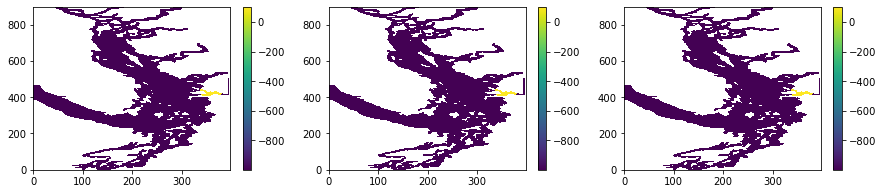

In [6]:
fig,ax=plt.subplots(1,3,figsize=(15,3))
m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['SFTURB'][0,:,:]))
fig.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['SFTURB'][1,:,:]))
fig.colorbar(m,ax=ax[1])
m=ax[2].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['SFTURB'][2,:,:]))
fig.colorbar(m,ax=ax[2])

102.99634
103.00942
103.022514
103.03561
103.04869
103.06178
103.07487
103.08796
103.10105


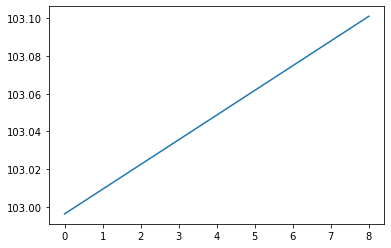

In [7]:
x=list()
for ii in range(0,9):
    print(np.max(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['SFTURB'][ii,:,:])))
    x.append(np.max(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['SFTURB'][ii,:,:])))
plt.plot(x)

In [9]:
tf0=nc.Dataset('/results/forcing/rivers/river_turb/riverTurbDaily2_y2015m03d31.nc')

In [10]:
tf1=nc.Dataset('/results/forcing/rivers/river_turb/riverTurbDaily2_y2015m04d01.nc')

In [11]:
tf2=nc.Dataset('/results/forcing/rivers/river_turb/riverTurbDaily2_y2015m04d02.nc')

In [12]:
tf0.variables['turb']

<class 'netCDF4._netCDF4.Variable'>
float64 turb(time_counter, y, x)
unlimited dimensions: time_counter
current shape = (1, 898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used

In [13]:
np.unique(tf0.variables['turb'][0,:,:])

masked_array(data=[-999.99   ,   88.85375],
             mask=False,
       fill_value=1e+20)

In [14]:
np.unique(tf1.variables['turb'][0,:,:])

masked_array(data=[-999.99      ,  117.12583333],
             mask=False,
       fill_value=1e+20)

In [15]:
np.unique(tf2.variables['turb'][0,:,:])

masked_array(data=[-999.99      ,  126.20458333],
             mask=False,
       fill_value=1e+20)

In [16]:
np.unique(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['SFTURB'][-1,:,:]))

masked_array(data=[-999.989990234375, 103.1141357421875, --],
             mask=[False, False,  True],
       fill_value=1e+20,
            dtype=float32)

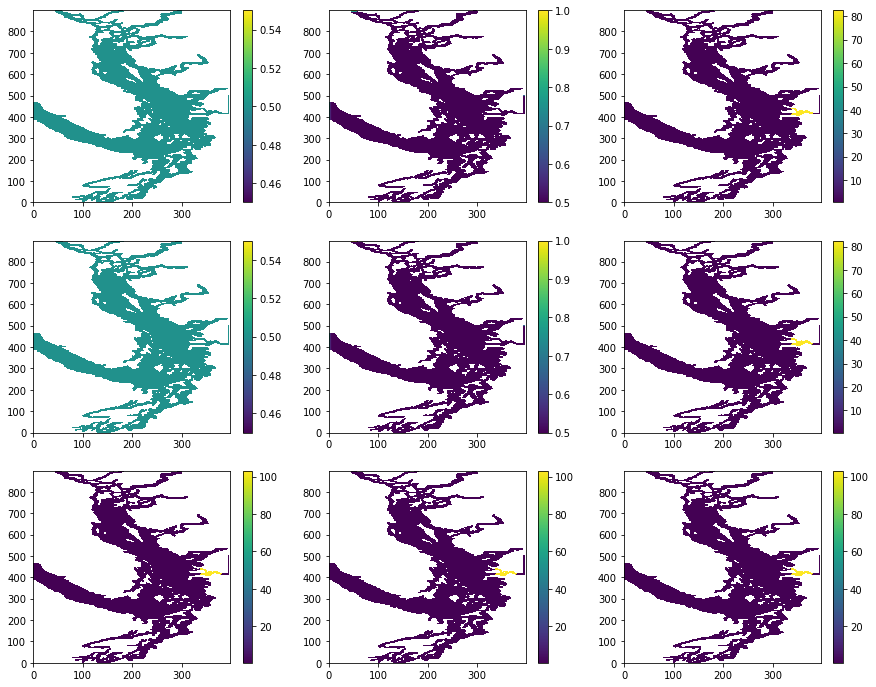

In [17]:
fig,ax=plt.subplots(3,3,figsize=(15,12))
ax=ax.flatten()
m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN0'][0,0,:,:]))
fig.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN0'][1,0,:,:]))
fig.colorbar(m,ax=ax[1])
m=ax[2].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN0'][2,0,:,:]))
fig.colorbar(m,ax=ax[2])
m=ax[3].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN1'][0,0,:,:]))
fig.colorbar(m,ax=ax[3])
m=ax[4].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN1'][1,0,:,:]))
fig.colorbar(m,ax=ax[4])
m=ax[5].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN1'][2,0,:,:]))
fig.colorbar(m,ax=ax[5])
m=ax[6].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN2'][0,0,:,:]))
fig.colorbar(m,ax=ax[6])
m=ax[7].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN2'][1,0,:,:]))
fig.colorbar(m,ax=ax[7])
m=ax[8].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN2'][2,0,:,:]))
fig.colorbar(m,ax=ax[8])

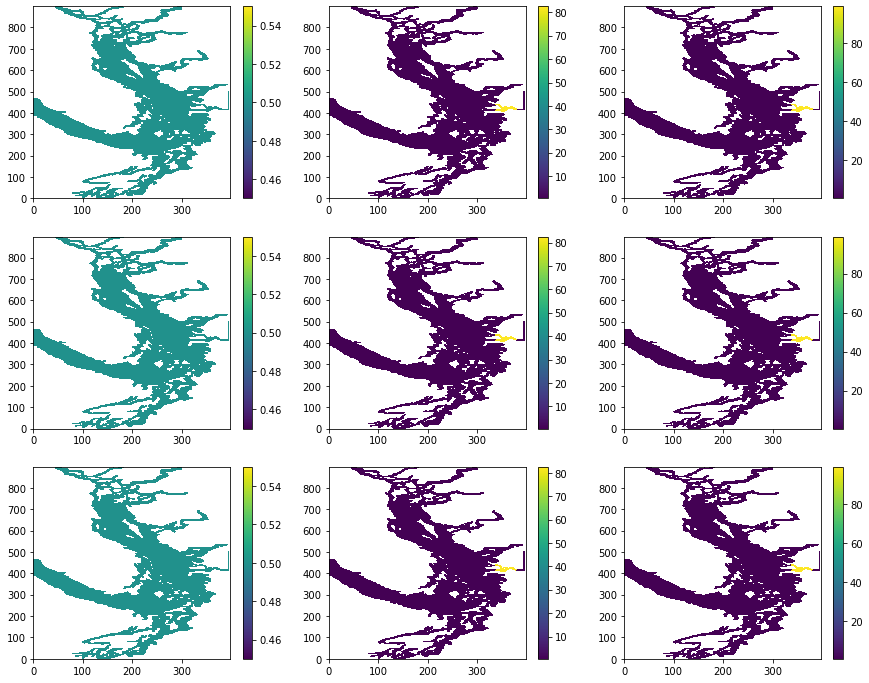

In [18]:
fig,ax=plt.subplots(3,3,figsize=(15,12))
ax=ax.flatten()
m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRB0'][0,0,:,:]))
fig.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRB0'][1,0,:,:]))
fig.colorbar(m,ax=ax[1])
m=ax[2].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRB0'][2,0,:,:]))
fig.colorbar(m,ax=ax[2])
m=ax[3].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRB1'][0,0,:,:]))
fig.colorbar(m,ax=ax[3])
m=ax[4].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRB1'][1,0,:,:]))
fig.colorbar(m,ax=ax[4])
m=ax[5].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRB1'][2,0,:,:]))
fig.colorbar(m,ax=ax[5])
m=ax[6].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRB2'][0,0,:,:]))
fig.colorbar(m,ax=ax[6])
m=ax[7].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRB2'][1,0,:,:]))
fig.colorbar(m,ax=ax[7])
m=ax[8].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRB2'][2,0,:,:]))
fig.colorbar(m,ax=ax[8])

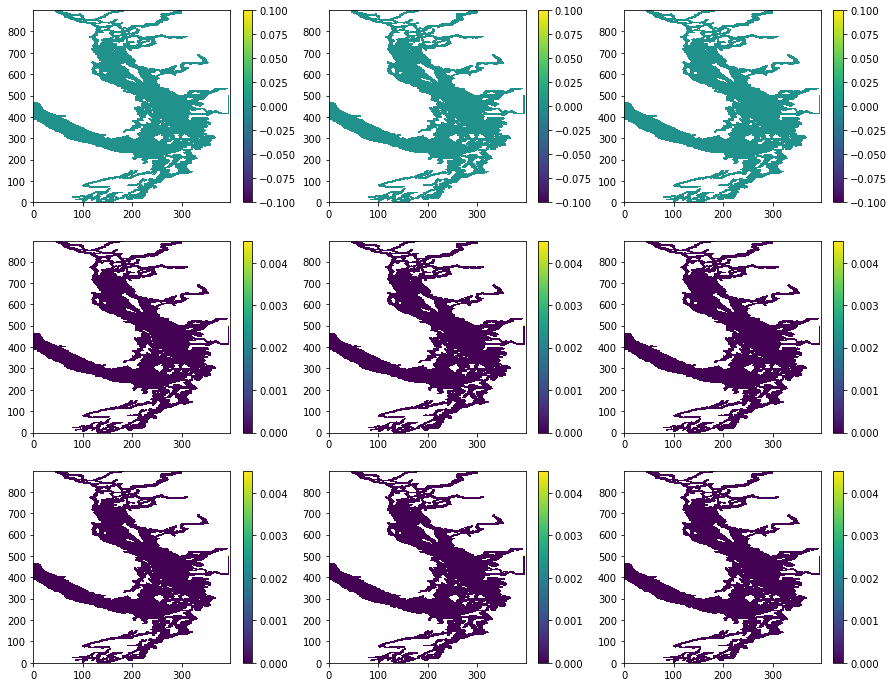

In [19]:
fig,ax=plt.subplots(3,3,figsize=(15,12))
ax=ax.flatten()
m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRA0'][0,0,:,:]))
fig.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRA0'][1,0,:,:]))
fig.colorbar(m,ax=ax[1])
m=ax[2].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRA0'][2,0,:,:]))
fig.colorbar(m,ax=ax[2])
m=ax[3].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRA1'][0,0,:,:]))
fig.colorbar(m,ax=ax[3])
m=ax[4].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRA1'][1,0,:,:]))
fig.colorbar(m,ax=ax[4])
m=ax[5].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRA1'][2,0,:,:]))
fig.colorbar(m,ax=ax[5])
m=ax[6].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRA2'][0,0,:,:]))
fig.colorbar(m,ax=ax[6])
m=ax[7].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRA2'][1,0,:,:]))
fig.colorbar(m,ax=ax[7])
m=ax[8].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRA2'][2,0,:,:]))
fig.colorbar(m,ax=ax[8])

In [20]:
x,y=np.where((f0.variables['RIVTRA1'][0,0,:,:]>0)&(f0.variables['RIVTRA1'][0,0,:,:]<1e7))

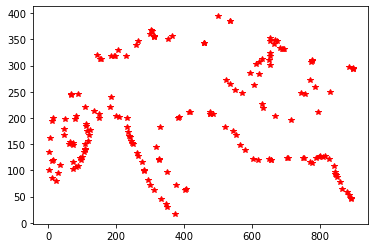

In [21]:
plt.plot(x,y,'r*')

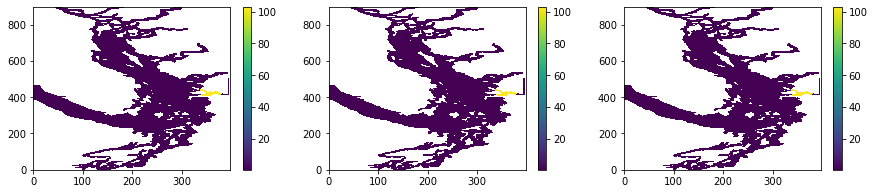

In [22]:
fig,ax=plt.subplots(1,3,figsize=(15,3))
m=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN1'][-3,0,:,:]))
fig.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN1'][-2,0,:,:]))
fig.colorbar(m,ax=ax[1])
m=ax[2].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,f0.variables['RIVTRN1'][-1,0,:,:]))
fig.colorbar(m,ax=ax[2])

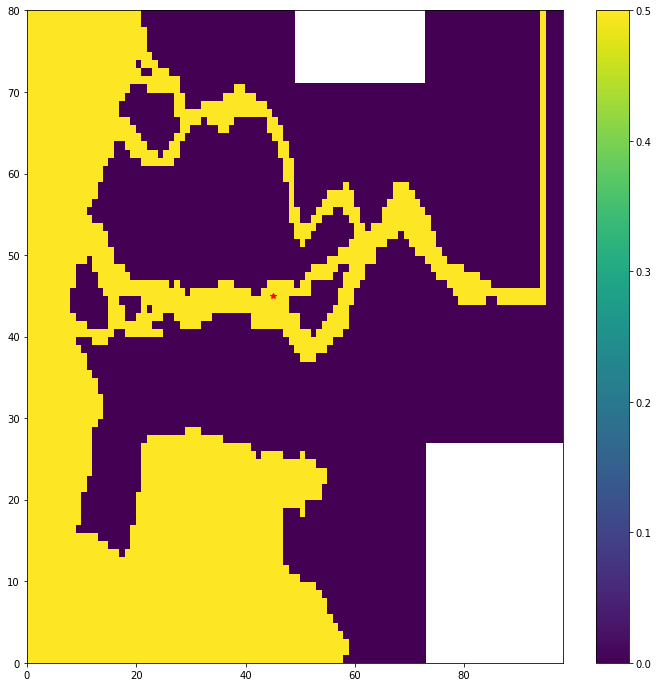

In [23]:
fig,ax=plt.subplots(1,1,figsize=(12,12))
m=ax.pcolormesh(f0.variables['TUR2'][0,0,370:450,300:])
fig.colorbar(m)
ax.plot(45,45,'r*')

In [25]:
print(f0.variables['RIVTRN1'][:,0,370+45,300+45])

[  0.5         0.5000001  82.49711    98.90699   102.19943   102.86839
 103.01266   103.05198   103.07031   103.08445  ]
